# Finding Heavy Traffic Indicators on I-94

The goal of this project is to determine indicators of heavy traffice on __[I-94](https://en.wikipedia.org/wiki/Interstate_94)__. (i.e. weather, time of day/week, etc.). We will be using the dataset made available by John Hogue from UC Irvine.

## I-94 Traffic Dataset

The dataset we will be using for this project is available at __[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume#)__.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

metro = pd.read_csv('Metro_Interstate_Traffic_Volume.csv.gz')
metro.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [9]:
metro.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [10]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


From our intial anaylsis of the dataset we can see that there are 9 columns and 48204 rows with no null values. We should note that this data only includes west-bound traffic near the station that recorded the data. 

## Traffic Volume

Let's begin our analysis by using a histogram to look at the traffic_volume column.

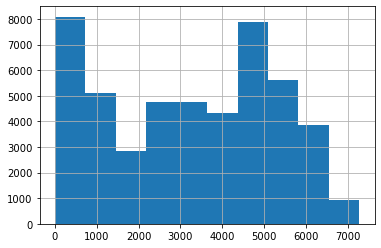

In [11]:
metro['traffic_volume'].hist()
plt.show()

In [12]:
metro['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

It appears that traffic volume is at it's highest in the morning and early evening, correlating with the typical time people are going to and from work respectively. The volume stays steady throughout the day in between those two times and significantly falls off as the day comes to an end. Let's further analyze the difference between the daytime and nighttime traffic.

## Daytime and Nightime Traffic

First, we are going to divide the dataset into two parts:

* Daytime Data: 12Hours from 7am to 7pm
* Nighttime Data: 12Hours from 7pm to 7am

In [13]:
metro['date_time'] = pd.to_datetime(metro['date_time'])

In [14]:
day = metro.copy()[(metro['date_time'].dt.hour >= 7) & (metro['date_time'].dt.hour < 19)]
print(day.shape)

night = metro.copy()[(metro['date_time'].dt.hour >= 19) | (metro['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


We can see that there is a difference between the rows in the day time and night time. This is the result of a few hours of missing data.

## Day vs. Night Traffic Volume

Let's now look at histograms comparing traffic volume from the day time to traffic volume from night.

Text(0, 0.5, 'Frequency')

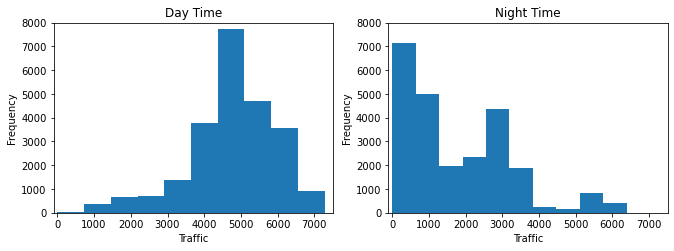

In [15]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Day Time')
plt.xlabel('Traffic')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Night Time')
plt.xlabel('Traffic')
plt.ylabel('Frequency')

In [16]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [28]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

We see that the day traffic is left skewed compared to the right skewed night traffic. Many more cars pass by the recording station during the day than at night. Since we want information on heavy traffic indicators, we will only be using the daytime data going forward.

## Time Indicators - Month

Let's now look at time as a possible indicator of heavy traffic. 

Using line plots we will show how the traffic volume changes based on the following:

* Month
* Day of the week
* Time of day

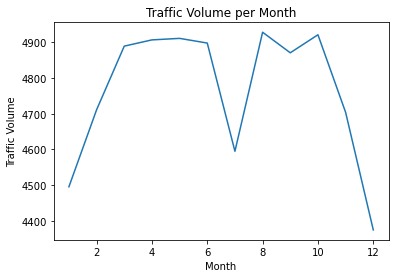

In [31]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume'].plot.line()
plt.title('Traffic Volume per Month')
plt.xlabel('Month')
plt.ylabel('Traffic Volume')
plt.show()

It appears that winter months has significantly less traffic than in colder months. The one exception to that being the month of July. Let's see if we can see why this is the case by plotting the average traffic volume per year.

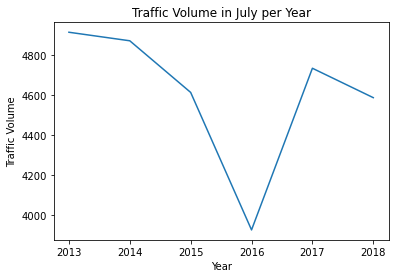

In [33]:
day['year'] = day['date_time'].dt.year
july = day[day['month'] == 7]
july.groupby('year').mean()['traffic_volume'].plot.line()
plt.title('Traffic Volume in July per Year')
plt.xlabel('Year')
plt.ylabel('Traffic Volume')
plt.show()

It looks like the travel patterns are consistent with other summer months except in the year 2016. A quick google search shows that there was construction that year that slowed down traffic that summer. 

## Time Indicators - Day of the Week

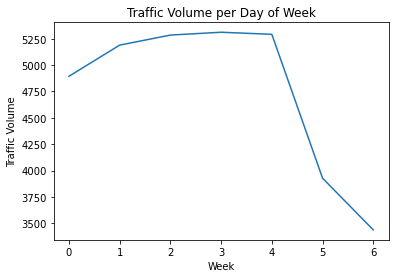

In [37]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()  # 0 is Monday, 6 is Sunday
plt.title('Traffic Volume per Day of Week')
plt.xlabel('Week')
plt.ylabel('Traffic Volume')
plt.show()

Traffic volume is higher during the business days (Monday-Friday). Each day except Monday we see values over 5,000 and the volume significantly drops off over the weekend.

## Time Indicator - Time of Day

Let's now look at the traffic volume per hour of the day. Since there is such a significant difference between volume during business days and the weekend, we will separate our graphs between the two.

In [38]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # Friday
weekend = day.copy()[day['dayofweek'] >= 5] # Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


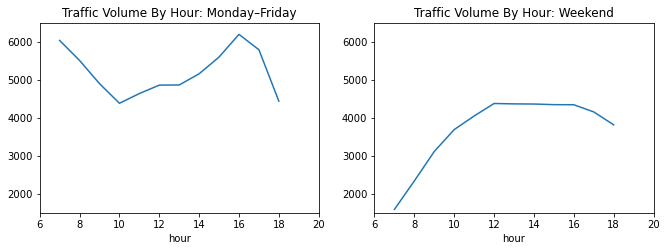

In [22]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

As we expected we see higher volumes throughout the day during the business days. There are volumes of over 6,000 vehicles during the peak hours of the day for travel (7 and 16) when people are traveling to and from work respectively. 

Let's summarize what we have discovered so far from our time indicators:

* Traffic is heavier during warm months vs. cold months
* Traffic is heavier during business days vs. weekends
* Traffic is heavier during rush hour around 7 and 16

Now let's look at weather indicators.

## Weather Indicators

Weather is another possible indicator of heavy traffic. Our dataset provides valuable information on the weather, so we will begin by finding the correlation values of the weather conditions with traffic volume.

In [23]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

We can see that the temperature shows the strongest correlation at roughly +0.13. The other weather indicators do not show a strong correlation.

Now, let's generate a scatter plot to visualize the correlation between temperature and traffic volume.

Text(0, 0.5, 'Temperature')

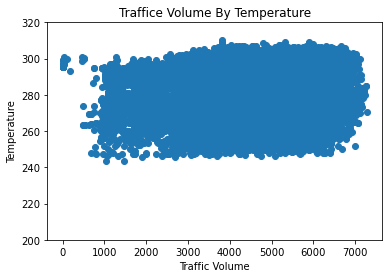

In [24]:
plt.scatter(day['traffic_volume'], day['temp'])
plt.title('Traffice Volume By Temperature')
plt.ylim(200, 320)
plt.xlabel('Traffic Volume')
plt.ylabel('Temperature')

It looks like temperature is not as good an indicator as we anticipated.

Let's now go to the other weather columns that are in our dataset. 

## Weather Types

Let's begin this part of our analysis by grouping our data by the weather_main column and looking at the traffic volume averages using a bar chart.

In [25]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

<AxesSubplot:ylabel='weather_main'>

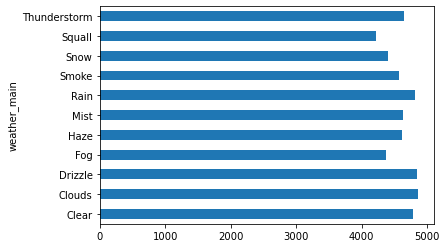

In [26]:
by_weather_main['traffic_volume'].plot.barh()

Now let's do something similar with the weather description column.

<AxesSubplot:ylabel='weather_description'>

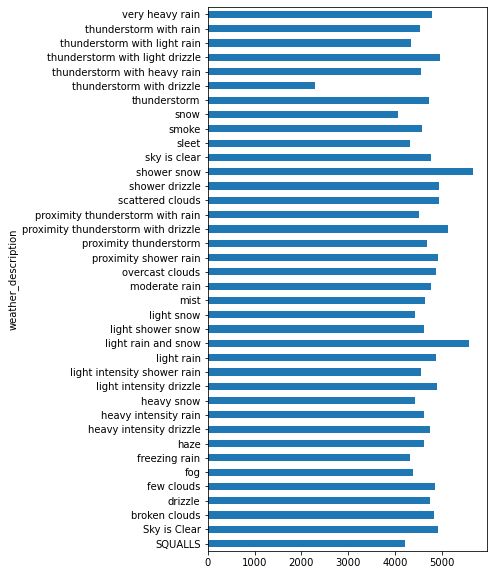

In [27]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5, 10))


We can see that there are not any instances where the traffic volume reaches 6,000  vehicles in our weather main column, but there are three instances where they do in our weather description graph:

* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle

It is not directly clear why that is the case. We can assume that more people are more likely to drive in those conditions than rely on other means of transportation.

## Conclusion

The aim of this project was to try to find heavy traffic indicators on the I-94 highway. We concluded that there were two main indicators of heavy traffic and found the specifics of each one. They are as follows:

* Time Indicators
    * Traffic is heavier during warm months than colder months
    * Traffic is heavier on business days than the weekend
    * Business day rush hour are around 7 and 16
* Weather Indicators
    * Shower Snow
    * Light rain and snow
    * Proximity thunderstorm with drizzle